## **Logistic Regression:** Breast Cancer Detection

The dataset is related to breast cancer diagnosis, where the goal is to classify a tumor as either benign or malignant based on various features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.

**Dependent Variable:** Diagnosis which is a **binary** target variable with two possible values; **"M" for malignant** (indicating cancerous tumors) and **"B" for benign**(indicating non-cancerous tumors). It has been **encoded** to **1 for malignant** and **0 for benign** for model training purposes.

**Independent Variables (Features):** These are numerical features that represent measurements of the cell nuclei in the breast tissue samples. They fall into three categories for each characteristic: **mean, standard error (SE), and "worst" (largest mean value for each measurement)**. There are **30** such features.

**Problem Statement:** The goal is to build a logistic regression model to classify breast tumors as benign or malignant based on 30 numerical features extracted from FNA images of breast tissue. The target variable, **Diagnosis**, is **binary** (1 for malignant, 0 for benign). By analyzing these features, the model aims to accurately predict malignancy, supporting early breast cancer detection and aiding clinical decision-making.

In [2]:
## importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_curve, auc

In [6]:
## importing dataset
data = pd.read_csv("C:/Users/Nandita/OneDrive/Desktop/Resume_Projects/Breast Cancer Dataset/data.csv")
## dropping columns with only missing values
data = data.dropna(axis=1, how='all')

**Logistic regression** is suitable here as it models binary outcomes, making it ideal for classifying whether a tumor is benign or malignant. It also provides probabilities for each class, allowing us to set thresholds if needed, and is generally interpretable, which is beneficial in healthcare contexts.

### **Balance of Classes**

The dataset contains information on breast cancer diagnosis, where the target variable diagnosis indicates if a case is malignant (M) or benign (B). The class distribution is as follows:
**Benign (B): 62.74%**
**Malignant (M): 37.26%**.
This **slight imbalance** suggests that while both classes are well-represented, **malignant cases are less frequent than benign ones**.

diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64


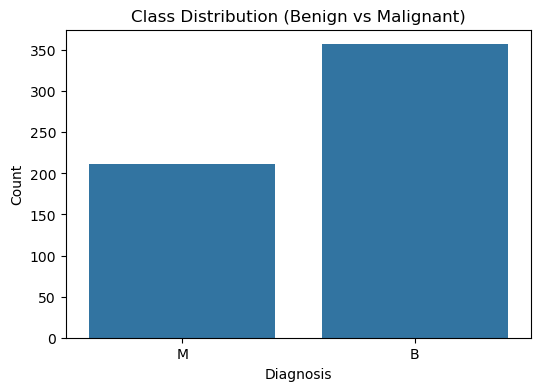

In [10]:
## checking for class balance in the 'diagnosis' column
class_balance = data['diagnosis'].value_counts(normalize=True)
## displaying the class balance as a proportion
print (class_balance)
## checking data balance
plt.figure(figsize=(6, 4))
sns.countplot(x=data['diagnosis'])
plt.title("Class Distribution (Benign vs Malignant)")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

In [12]:
## encoding the target variable
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

## separate features and target variable
X = data.drop(['id', 'diagnosis'], axis=1)
y = data['diagnosis']

## splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
## initializing and fitting the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [16]:
## predicting on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [18]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

### **Model Evaluation**
#### **Confusion Matrix**

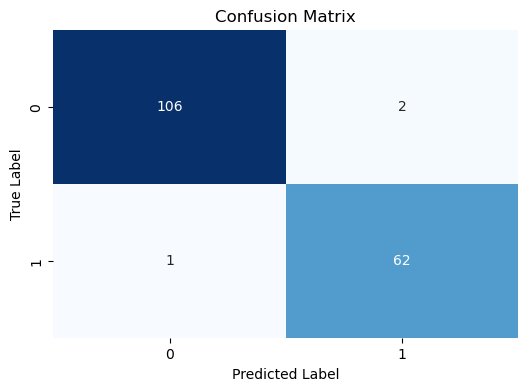

In [21]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

The **confusion matrix** reveals that the model achieved high accuracy in classification. It correctly identified 106 benign cases (true negatives) and 62 malignant cases (true positives). Only 2 benign cases were incorrectly classified as malignant (false positives), and there was 1 malignant case misclassified as benign (false negative). This **minimal number of misclassifications** demonstrates the **model’s effectiveness** in distinguishing between benign and malignant cases with high precision and recall.

#### **ROC Curve**

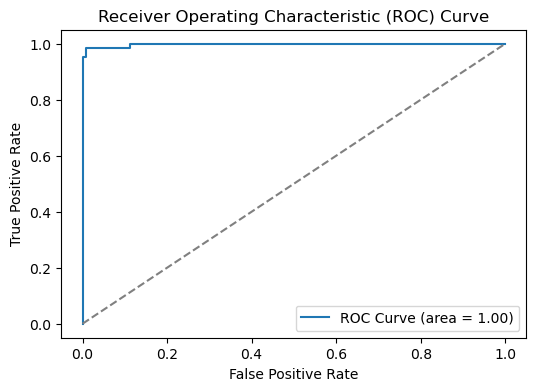

In [25]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

The **ROC curve** further illustrates the **model’s strong performance**, plotting the true positive rate against the false positive rate. With an area under the curve **(AUC) close to 1.0**, the model shows an excellent ability to differentiate between benign and malignant cases. A high AUC indicates that the model can maintain a **high sensitivity (true positive rate) while keeping the false positive rate low**, reinforcing its reliability in accurate classification.

In [28]:
metrics = {
    "Accuracy": accuracy_score,
    "Precision": precision_score,
    "Recall": recall_score,
    "F1 Score": f1_score,
    "ROC AUC": roc_auc_score}
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"],
    "Score": [accuracy, precision, recall, f1, roc_auc]})
print(metrics_df)

      Metric     Score
0   Accuracy  0.982456
1  Precision  0.968750
2     Recall  0.984127
3   F1 Score  0.976378
4    ROC AUC  0.997942


### **Conclusion**
Based on the confusion matrix, the logistic regression model demonstrates strong performance in classifying breast tumors. With 106 true negatives (benign cases correctly identified), 62 true positives (malignant cases correctly identified), 2 false positives (benign cases incorrectly classified as malignant), and 1 false negative (malignant case incorrectly classified as benign), the model shows high accuracy and effectiveness. This indicates that the model is reliable in distinguishing between benign and malignant tumors, making it a valuable tool for early breast cancer detection and diagnosis.

## **Ensemble Techniques:** Classification Tree

**Problem Statement:** The goal is to build a logistic regression model to classify breast tumors as benign or malignant based on 30 numerical features extracted from FNA images of breast tissue. The target variable, **Diagnosis**, is **binary** (1 for malignant, 0 for benign). By analyzing these features, the model aims to accurately predict malignancy, supporting early breast cancer detection and aiding clinical decision-making.

In [32]:
!pip install xgboost
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

### **Bagging**

In [37]:
## Initialize dictionary to store metrics
model_metrics = {}

## Bagging Classifier
bagging_model = BaggingClassifier(random_state=42)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)
y_pred_proba_bagging = bagging_model.predict_proba(X_test)[:, 1]

model_metrics["Bagging"] = {
    "Accuracy": accuracy_score(y_test, y_pred_bagging),
    "Precision": precision_score(y_test, y_pred_bagging),
    "Recall": recall_score(y_test, y_pred_bagging),
    "F1 Score": f1_score(y_test, y_pred_bagging),
    "ROC AUC": roc_auc_score(y_test, y_pred_proba_bagging)}

### **Random Forest**

In [40]:
## Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

model_metrics["Random Forest"] = {
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1 Score": f1_score(y_test, y_pred_rf),
    "ROC AUC": roc_auc_score(y_test, y_pred_proba_rf)}

### **AdaBoost**

In [43]:
## AdaBoost Classifier
ada_model = AdaBoostClassifier(algorithm='SAMME', random_state=42)
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)
y_pred_proba_ada = ada_model.predict_proba(X_test)[:, 1]

model_metrics["AdaBoost"] = {
    "Accuracy": accuracy_score(y_test, y_pred_ada),
    "Precision": precision_score(y_test, y_pred_ada),
    "Recall": recall_score(y_test, y_pred_ada),
    "F1 Score": f1_score(y_test, y_pred_ada),
    "ROC AUC": roc_auc_score(y_test, y_pred_proba_ada)}

### **XGBoost**

In [46]:
## XGBoost Classifier
xgb_model = XGBClassifier(eval_metric="logloss", random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

model_metrics["XGBoost"] = {
    "Accuracy": accuracy_score(y_test, y_pred_xgb),
    "Precision": precision_score(y_test, y_pred_xgb),
    "Recall": recall_score(y_test, y_pred_xgb),
    "F1 Score": f1_score(y_test, y_pred_xgb),
    "ROC AUC": roc_auc_score(y_test, y_pred_proba_xgb)}

In [48]:
## Convert metrics dictionary to DataFrame for comparison
metrics_df = pd.DataFrame(model_metrics).T
print("Model Comparison Metrics:")
print(metrics_df)

Model Comparison Metrics:
               Accuracy  Precision    Recall  F1 Score   ROC AUC
Bagging        0.953216   0.936508  0.936508  0.936508  0.983245
Random Forest  0.970760   0.983333  0.936508  0.959350  0.996914
AdaBoost       0.970760   0.953125  0.968254  0.960630  0.995444
XGBoost        0.970760   0.953125  0.968254  0.960630  0.994415


### **Model Comparison**
The models show strong overall performance, with **Random Forest** achieving the highest precision (98.33%) and ROC AUC (0.99691), making it the most effective at correctly identifying malignant cases with minimal false positives. **AdaBoost** and **XGBoost** both perform equally well in accuracy (97.08%), recall (96.83%), and F1 score (96.06%), indicating a strong balance in identifying true positives and minimizing false negatives. **Bagging** has slightly lower metrics, with an accuracy of 95.32% and ROC AUC of 0.983245, making it effective but less precise than the other methods. Overall, **Random Forest is the best for conservative predictions, while AdaBoost and XGBoost offer optimal balance in performance**.

### **Variable Importance Measure**

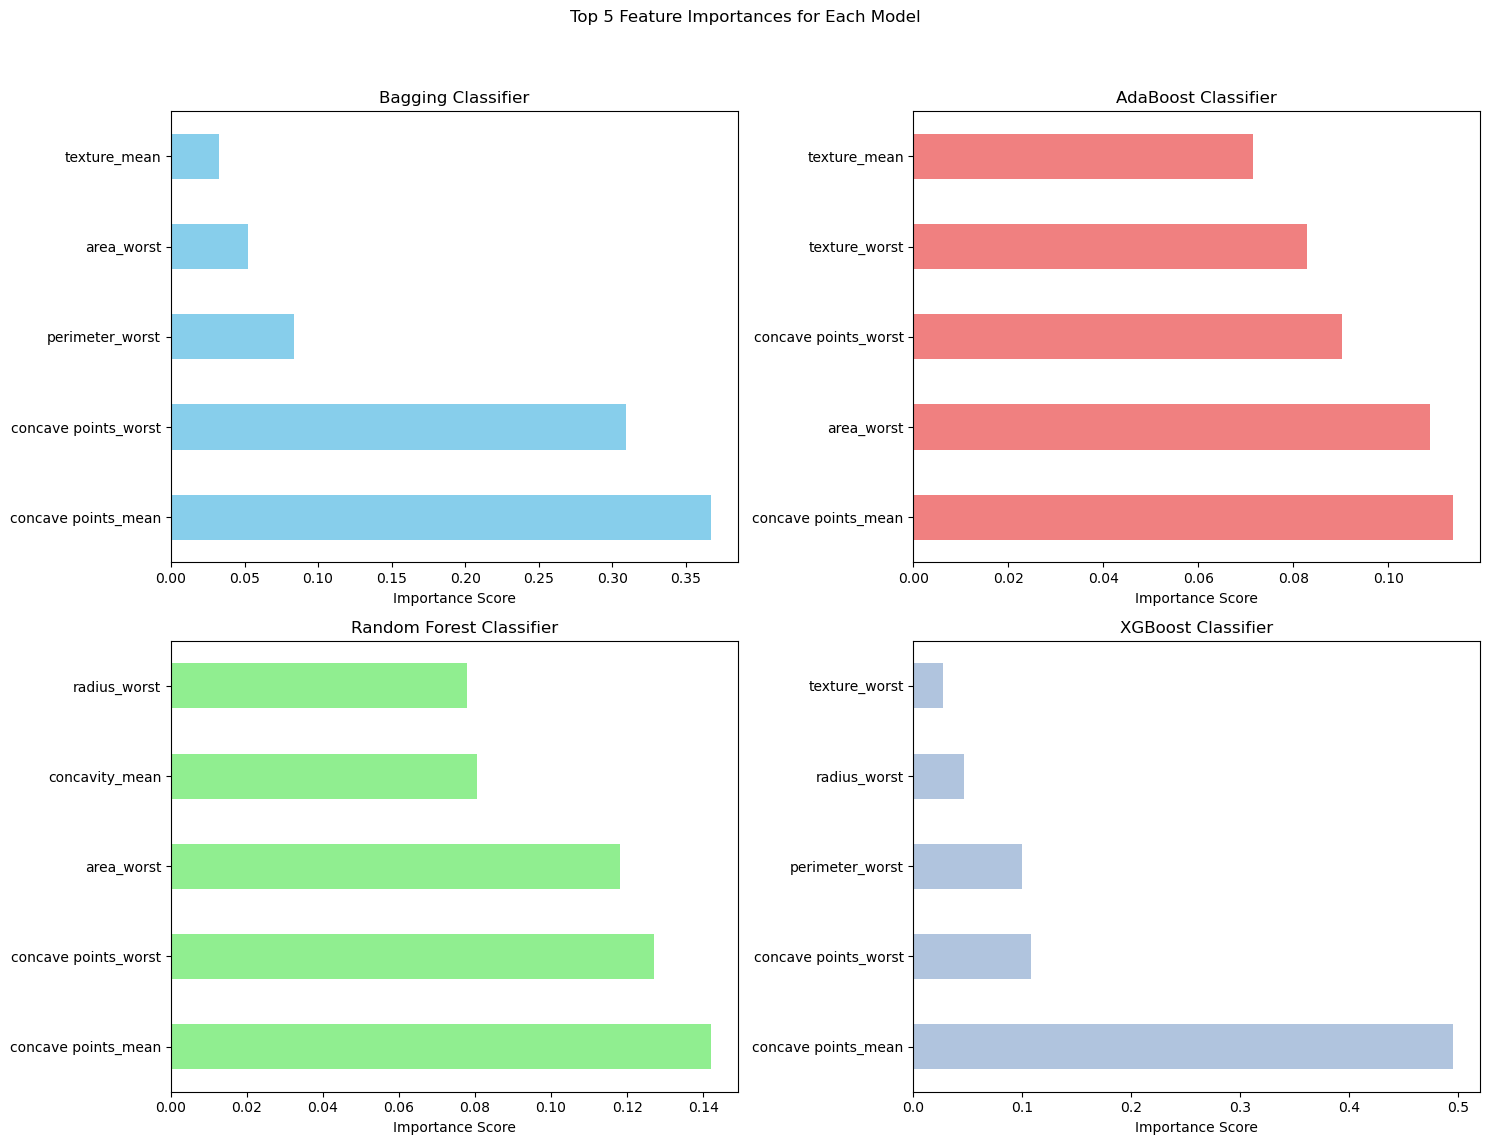

In [52]:
feature_names = data.drop(["id", "diagnosis"], axis=1).columns
# Bagging Classifier
bagging_importances = np.mean([tree.feature_importances_ for tree in bagging_model.estimators_], axis=0)
feature_importance_bagging = pd.Series(bagging_importances, index=feature_names)
# AdaBoost Classifier
feature_importance_ada = pd.Series(ada_model.feature_importances_, index=feature_names)
# Random Forest Classifier
feature_importance_rf = pd.Series(rf_model.feature_importances_, index=feature_names)
# XGBoost Classifier
feature_importance_xgb = pd.Series(xgb_model.feature_importances_, index=feature_names)
# Plotting top 5 important features for each model
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle("Top 5 Feature Importances for Each Model")
# Bagging
feature_importance_bagging.sort_values(ascending=False).head(5).plot(kind="barh", ax=axes[0, 0], color="skyblue")
axes[0, 0].set_title("Bagging Classifier")
axes[0, 0].set_xlabel("Importance Score")
# AdaBoost
feature_importance_ada.sort_values(ascending=False).head(5).plot(kind="barh", ax=axes[0, 1], color="lightcoral")
axes[0, 1].set_title("AdaBoost Classifier")
axes[0, 1].set_xlabel("Importance Score")
# Random Forest
feature_importance_rf.sort_values(ascending=False).head(5).plot(kind="barh", ax=axes[1, 0], color="lightgreen")
axes[1, 0].set_title("Random Forest Classifier")
axes[1, 0].set_xlabel("Importance Score")
# XGBoost
feature_importance_xgb.sort_values(ascending=False).head(5).plot(kind="barh", ax=axes[1, 1], color="lightsteelblue")
axes[1, 1].set_title("XGBoost Classifier")
axes[1, 1].set_xlabel("Importance Score")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### **Conclusion**

The **high accuracy** scores across all models **(above 95%)** indicate their **reliability in classifying breast tumors as benign or malignant**, an essential factor in clinical settings to reduce misclassification. **High precision, especially in the Random Forest model (0.983)**, means the models effectively minimize false positives, which helps avoid unnecessary follow-up tests for benign cases. **Strong recall values**, particularly for AdaBoost and XGBoost (0.968), demonstrate the models’ ability to identify most malignant tumors, supporting early detection. The **F1 scores around 0.96** for AdaBoost, XGBoost, and Random Forest show balanced performance in identifying malignant cases **without significant trade-offs between precision and recall**. The high ROC AUC values, with Random Forest at 0.997, suggest excellent discrimination between benign and malignant cases, with Random Forest standing out as the most effective model overall. Thus, **Random Forest is likely the best choice for this classification task, given its high precision, balanced F1 score, and superior ROC AUC, making it well-suited for early breast cancer detection while minimizing both false positives and false negatives, which is crucial for impactful clinical decision-making.**